## Importing Libraries and Datasets

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import category_encoders as ce

In [2]:
df = pd.read_csv("D:\Python\Project\HandsonML\datasets\income_evaluation.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


* age: continuous.
* workclass: 
    1. Private, 
    2. Self-emp-not-inc, 
    3. Self-emp-inc, 
    4. Federal-gov, 
    5. Local-gov, 
    6. State-gov, 
    7. Without-pay, 
    8. Never-worked.
* fnlwgt: continuous.
* education: 
    1. Bachelors, 
    2. Some-college, 
    3. 11th, 
    4. HS-grad, 
    5. Prof-school, 
    6. Assoc-acdm, 
    7. Assoc-voc, 
    8. 9th, 
    9. 7th-8th, 
    10. 12th, 
    11. Masters, 
    12. 1st-4th, 
    13. 10th, 
    14. Doctorate, 
    15. 5th-6th, 
    16. Preschool.
* education-num: continuous.
* marital-status: 
    1. Married-civ-spouse, 
    2. Divorced, 
    3. Never-married, 
    4. Separated, 
    5. Widowed, 
    6. Married-spouse-absent, 
    7. Married-AF-spouse.
* occupation: 
    1. Tech-support, 
    2. Craft-repair, 
    3. Other-service, 
    4. Sales, 
    5. Exec-managerial, 
    6. Prof-specialty, 
    7. Handlers-cleaners, 
    8. Machine-op-inspct, 
    9. Adm-clerical, 
    10. Farming-fishing, 
    11. Transport-moving, 
    12. Priv-house-serv, 
    13. Protective-serv, 
    14. Armed-Forces.
* relationship: 
    1. Wife, 
    2. Own-child, 
    3. Husband, 
    4. Not-in-family, 
    5. Other-relative, 
    6. Unmarried.
* race: 
    1. White, 
    2. Asian-Pac-Islander, 
    3. Amer-Indian-Eskimo, 
    4. Other, 
    5. Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.shape

(32561, 15)

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [9]:
# Renaming the columns
column_names = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship',
                'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df.columns = column_names

### Univariate Data Analysis

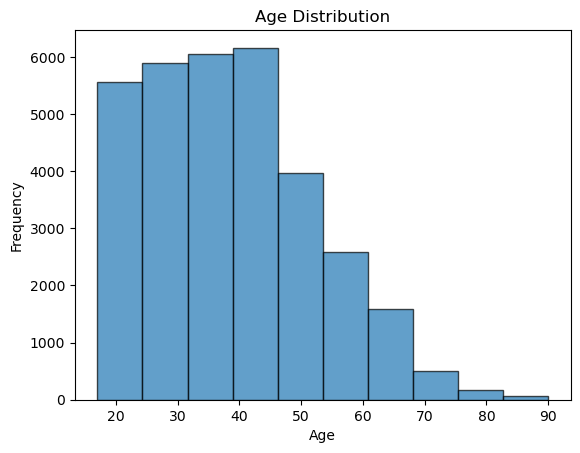

In [10]:
# Age distribution

plt.hist(df['age'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

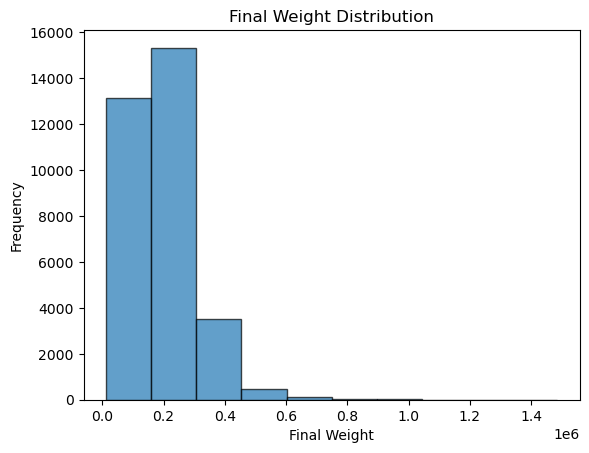

In [11]:
# Final Weight distribution

plt.hist(df['fnlwgt'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Final Weight')
plt.ylabel('Frequency')
plt.title('Final Weight Distribution')
plt.show()

C:\Users\Divya Tiwari\AppData\Local\Temp\ipykernel_2188\723916647.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['education_num'], shade=True)


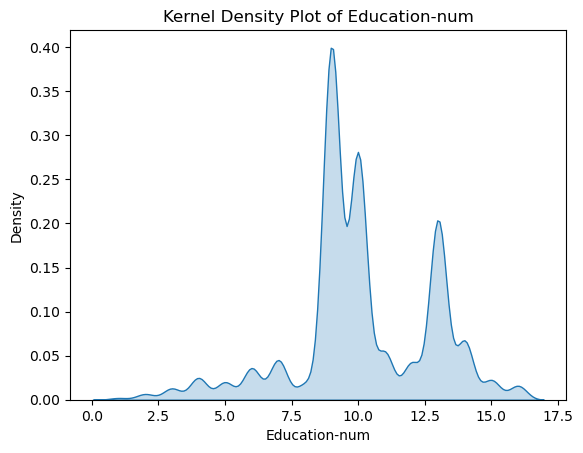

In [12]:
# Eduvation-num

sns.kdeplot(df['education_num'], shade=True)
plt.xlabel('Education-num')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Education-num')
plt.show()

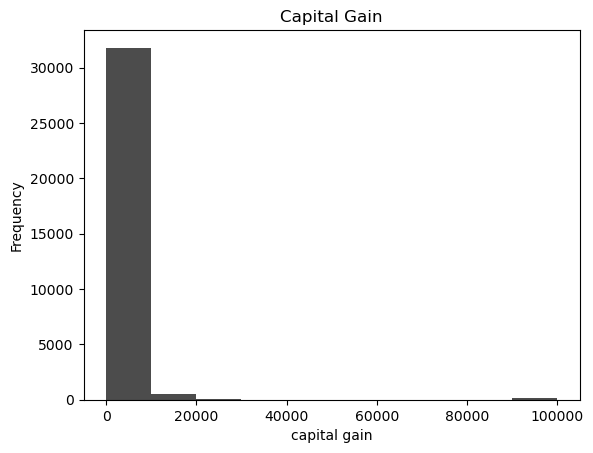

In [15]:
# Capital gain capital loss

plt.hist(df['capital-gain'], bins=10, color='black', label='capital-gain', alpha=0.7)
plt.xlabel('capital gain')
plt.ylabel('Frequency')
plt.title('Capital Gain')
plt.show()

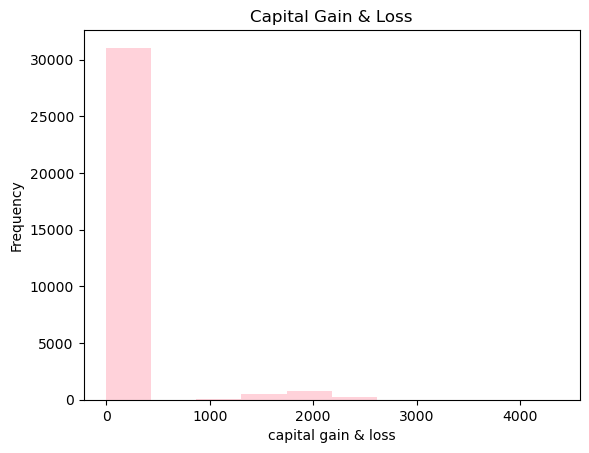

In [16]:
plt.hist(df['capital-loss'], bins=10, color='pink', label='capital-loss', alpha=0.7)
plt.xlabel('capital gain & loss')
plt.ylabel('Frequency')
plt.title('Capital Gain & Loss')
plt.show()

In [17]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [18]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [19]:
df['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [21]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [22]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

## Create Training and Test set

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop(['income'],axis=1)
y = df['income']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.10, random_state = 0)

In [37]:
X_train.shape, X_test.shape

((29304, 14), (3257, 14))

## Feature Engineering

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29304 entries, 9281 to 2732
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29304 non-null  int64 
 1   workclass       29304 non-null  object
 2   fnlwgt          29304 non-null  int64 
 3   education       29304 non-null  object
 4   education_num   29304 non-null  int64 
 5   marital_status  29304 non-null  object
 6   occupation      29304 non-null  object
 7   relationship    29304 non-null  object
 8   race            29304 non-null  object
 9   sex             29304 non-null  object
 10  capital-gain    29304 non-null  int64 
 11  capital-loss    29304 non-null  int64 
 12  hours-per-week  29304 non-null  int64 
 13  native-country  29304 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.4+ MB


marital_status, occupation, relationship, race, sex are nominal features.

workclass, education are ordinal features.

In [39]:
nominal = ['marital_status','occupation','relationship','race','sex', 'native-country']

# encode with nominal encoding
ohe = ce.OneHotEncoder(cols = nominal)

X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

In [40]:
X_train

,age,workclass,fnlwgt,education,education_num,marital_status_1,marital_status_2,marital_status_3,marital_status_4,marital_status_5,...,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,native-country_42
9281,38,Private,210438,7th-8th,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31884,41,Self-emp-inc,145441,Masters,14,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31580,55,Self-emp-not-inc,308746,Prof-school,15,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18489,66,Self-emp-not-inc,140456,Bachelors,13,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21111,39,Private,148015,HS-grad,9,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,43,Local-gov,33331,Masters,14,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19648,44,Private,98466,10th,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9845,23,Private,45317,Some-college,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10799,45,Local-gov,215862,Doctorate,16,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
ordinal = ['workclass','education']

# encode with ordinal encoding

ordinal = ce.OrdinalEncoder(cols=ordinal)

X_train = ordinal.fit_transform(X_train)
X_test = ordinal.transform(X_test)

X_train

,age,workclass,fnlwgt,education,education_num,marital_status_1,marital_status_2,marital_status_3,marital_status_4,marital_status_5,...,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41,native-country_42
9281,38,1,210438,1,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31884,41,2,145441,2,14,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31580,55,3,308746,3,15,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18489,66,3,140456,4,13,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21111,39,1,148015,5,9,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,43,6,33331,2,14,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19648,44,1,98466,13,6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9845,23,1,45317,8,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10799,45,6,215862,10,16,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Importing the model

In [46]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes = 85, n_jobs = -1)
rnd_clf.fit(X_train,y_train)

y_pred = rnd_clf.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8501688670555726

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       <=50K       0.95      0.86      0.91      2700
        >50K       0.54      0.80      0.64       557

    accuracy                           0.85      3257
   macro avg       0.75      0.83      0.77      3257
weighted avg       0.88      0.85      0.86      3257



In [49]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune and their respective values to try
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_leaf_nodes': [None, 30, 40, 50, 60, 70, 80, 85, 90]
}

In [50]:
grid_search = GridSearchCV(estimator=rnd_clf, param_grid=param_grid, cv=3, n_jobs=-1)

In [51]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_leaf_nodes=85, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_leaf_nodes': [None, 30, 40, 50, 60, 70, 80, 85,
                                            90],
                         'n_estimators': [50, 100, 200]})

In [52]:
best_params = grid_search.best_params_

In [54]:
best_params

{'max_leaf_nodes': None, 'n_estimators': 100}

In [53]:
best_rf_model = grid_search.best_estimator_

In [55]:
best_rf_model

RandomForestClassifier(n_jobs=-1)

In [56]:
y_pred_best = best_rf_model.predict(X_test)

accuracy_score(y_pred_best, y_test)

0.8495548050353086

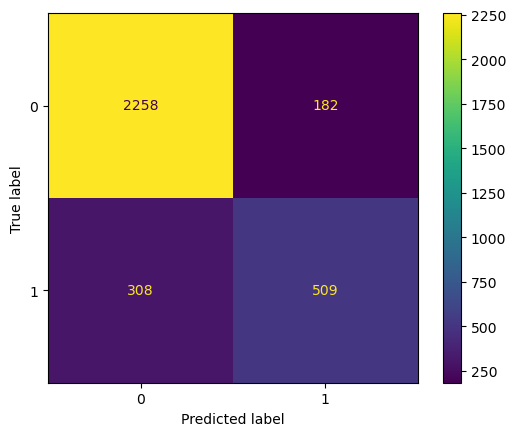

In [57]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_en = confusion_matrix(y_test, y_pred_best)

cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = cm_en)
cm_display.plot()